In [1]:

import sys
import os
from typing import List, Dict, Tuple, Any

eval_folder_paths =[
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_NoAugs",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/0923_AmazonSports_AllAugRand",
    "exp/shadow_with_weighted_dirichlet_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_Dirichlet_1e-1",
    "exp/shadow_with_weighted_dirichlet_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_Dirichlet_1e-2",
    "exp/shadow_with_fedex_weighted_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_RS_lr1e-1_no_decay",
    "exp/shadow_with_fedex_weighted_sasrec_on_sr_data_lr0.01_lstep20/1002_AmazonSports_Bayesian",
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/0928_AmazonSports_EpsGreedy",
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/AmazonSports_MAB",
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/0928_AmazonSports_Thompson"
]
    
    
config_paths = [os.path.join(eval_folder_path, "config.yaml") for eval_folder_path in eval_folder_paths]
evaluation_log_paths = [os.path.join(eval_folder_path, "eval_results.log") for eval_folder_path in eval_folder_paths]
print_log_paths = [os.path.join(eval_folder_path, "exp_print.log") for eval_folder_path in eval_folder_paths]

keys_for_each_run= [ folder_path.split("/")[-1] for folder_path in eval_folder_paths]
print(keys_for_each_run)


['0930_AmazonSports_NoAugs', '0923_AmazonSports_AllAugRand', '0930_AmazonSports_Dirichlet_1e-1', '0930_AmazonSports_Dirichlet_1e-2', '0930_AmazonSports_RS_lr1e-1_no_decay', '1002_AmazonSports_Bayesian', '0928_AmazonSports_EpsGreedy', 'AmazonSports_MAB', '0928_AmazonSports_Thompson']


In [2]:
def load_log_file(file_path : str) -> str:
    """
    Load the log file and return the content as string.
    """
    with open(file_path, 'r') as file:
        log_content = file.read()
    
    return log_content

In [3]:
## Parse eval_results.log for each experiment


def parse_and_save_via_round(line : str):
    # string in line like
    #{'Role': 'Server #', 'Round': 2000, 'Results_raw': {'val_avg_loss': 9.027567139082548, 'val_total': 22363, 'val_loss': 201883.48393130302, 'val_recall_10': 0.03264320269227028, 'val_recall_20': 0.048294056206941605, 'val_ndcg_10': 0.013208270072937012, 'val_ndcg_20': 0.017058826982975006, 'test_avg_loss': 9.184074541816972, 'test_total': 22363, 'test_loss': 205383.45897865295, 'test_recall_10': 0.024236461147665977, 'test_recall_20': 0.036667708307504654, 'test_ndcg_10': 0.009666664525866508, 'test_ndcg_20': 0.012766502797603607}}
    
    #convert_to_dict
    import ast
    line_dict = ast.literal_eval(line)
    #print(line_dict.keys())
    
    try :
        return {
            "round" : line_dict["Round"],
            "test_loss" : line_dict["Results_raw"]["test_loss"],
            "test_recall_10" : line_dict["Results_raw"]["test_recall_10"],
            "test_recall_20" : line_dict["Results_raw"]["test_recall_20"],
            "test_ndcg_10" : line_dict["Results_raw"]["test_ndcg_10"],
            "test_ndcg_20" : line_dict["Results_raw"]["test_ndcg_20"]
        }
    except :
        None

exp_results = {}

for exp_key, eval_log_path in zip(keys_for_each_run, evaluation_log_paths):
    print(f"Experiment {exp_key} - {eval_log_path}")
    log_content = load_log_file(eval_log_path)
    
    current_exp_results = {
        "round" : [],
        "test_loss" : [],
        "test_recall_10" : [],
        "test_recall_20" : [],
        "test_ndcg_10" : [],
        "test_ndcg_20" : []
    }
    for line in log_content.split("\n"):
        if "Results_raw" in line:
            current_round_results= parse_and_save_via_round(line)
            if current_round_results is not None:
                for key in current_round_results.keys():
                    current_exp_results[key].append(current_round_results[key])
    exp_results[exp_key] = current_exp_results

Experiment 0930_AmazonSports_NoAugs - exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_NoAugs/eval_results.log
Experiment 0923_AmazonSports_AllAugRand - exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/0923_AmazonSports_AllAugRand/eval_results.log
Experiment 0930_AmazonSports_Dirichlet_1e-1 - exp/shadow_with_weighted_dirichlet_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_Dirichlet_1e-1/eval_results.log
Experiment 0930_AmazonSports_Dirichlet_1e-2 - exp/shadow_with_weighted_dirichlet_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_Dirichlet_1e-2/eval_results.log
Experiment 0930_AmazonSports_RS_lr1e-1_no_decay - exp/shadow_with_fedex_weighted_sasrec_on_sr_data_lr0.01_lstep20/0930_AmazonSports_RS_lr1e-1_no_decay/eval_results.log
Experiment 1002_AmazonSports_Bayesian - exp/shadow_with_fedex_weighted_sasrec_on_sr_data_lr0.01_lstep20/1002_AmazonSports_Bayesian/eval_results.log
Experiment 0928_AmazonSports_EpsGreedy - exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lste

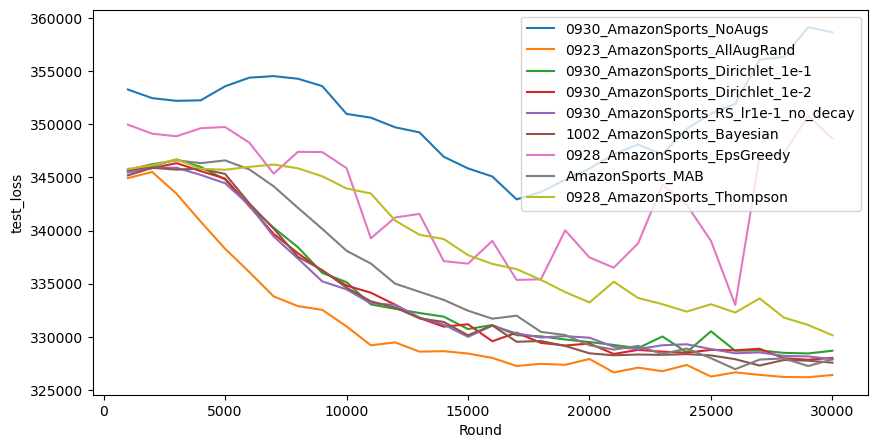

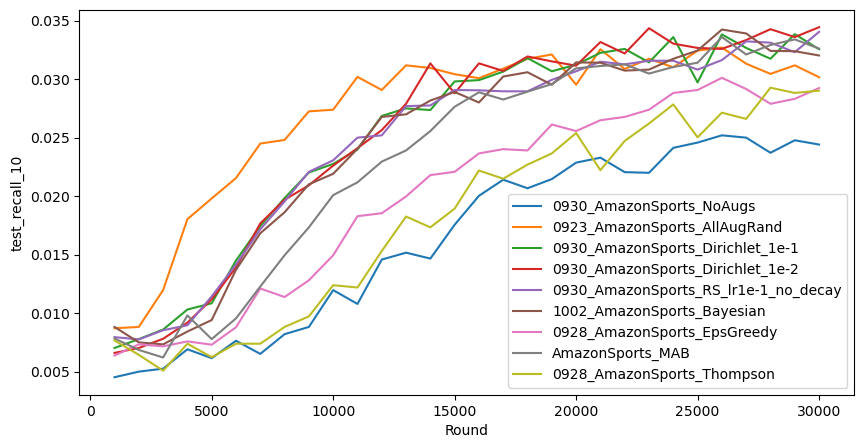

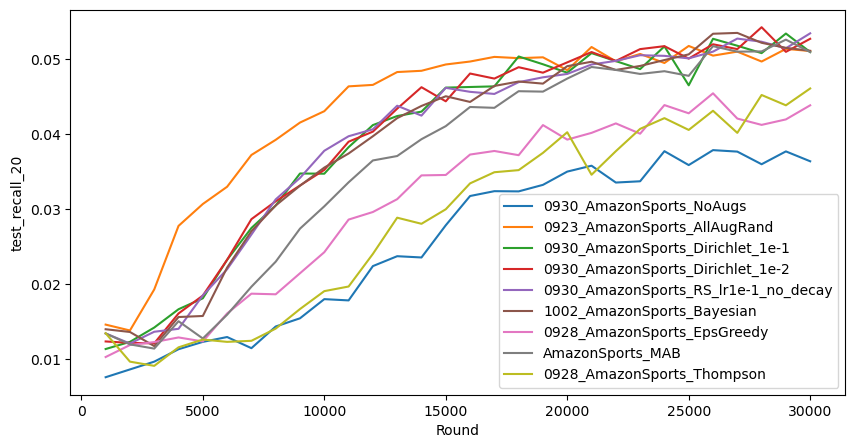

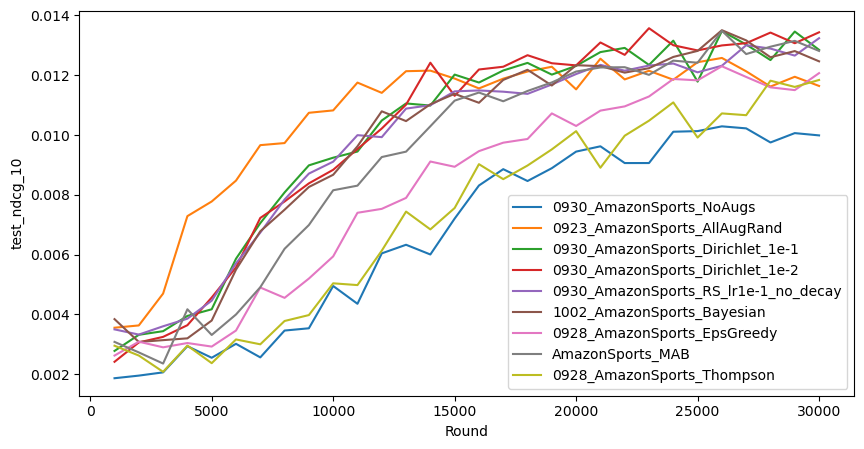

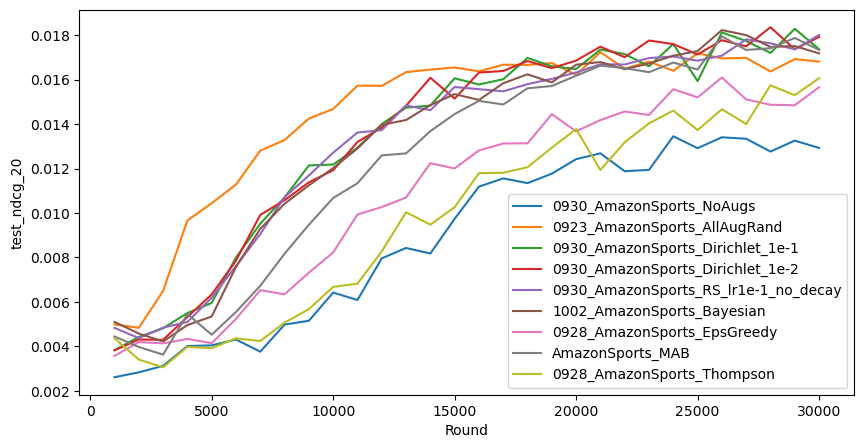

In [8]:
## Plot the results
import matplotlib.pyplot as plt
import numpy as np

def plot_results(exp_results : Dict[str, Dict[str, List[float]]], keys_for_each_run : List[str], metric : str, num : int = 0):
    plt.figure(figsize=(10, 5))
    for exp_key in keys_for_each_run:
        plt.plot(exp_results[exp_key]["round"][:num], exp_results[exp_key][metric][:num], label=exp_key)
    plt.xlabel("Round")
    plt.ylabel(metric)
    plt.legend()
    plt.show()
    
plot_results(exp_results, keys_for_each_run, "test_loss", 30)
plot_results(exp_results, keys_for_each_run, "test_recall_10", 30)
plot_results(exp_results, keys_for_each_run, "test_recall_20", 30)
plot_results(exp_results, keys_for_each_run, "test_ndcg_10", 30)
plot_results(exp_results, keys_for_each_run, "test_ndcg_20", 30)



In [9]:
## 8th result as a table
import pandas as pd

table_data = {
    "Exp" : [],
    "Recall@10" : [],
    "Recall@20" : [],
    "NDCG@10" : [],
    "NDCG@20" : []
}

n_th_round = 30

for exp_key in keys_for_each_run:
    table_data["Exp"].append(exp_key)
    ## round the result at 4th decimal
    table_data["Recall@10"].append( round(exp_results[exp_key]["test_recall_10"][n_th_round-1], 4))
    table_data["Recall@20"].append(round(exp_results[exp_key]["test_recall_20"][n_th_round-1], 4))
    table_data["NDCG@10"].append(round(exp_results[exp_key]["test_ndcg_10"][n_th_round-1], 4))
    table_data["NDCG@20"].append(round(exp_results[exp_key]["test_ndcg_20"][n_th_round-1], 4))

table_df = pd.DataFrame(table_data)
print(table_df)


                                    Exp  Recall@10  Recall@20  NDCG@10  \
0              0930_AmazonSports_NoAugs     0.0244     0.0364   0.0100   
1          0923_AmazonSports_AllAugRand     0.0302     0.0511   0.0116   
2      0930_AmazonSports_Dirichlet_1e-1     0.0326     0.0510   0.0129   
3      0930_AmazonSports_Dirichlet_1e-2     0.0344     0.0527   0.0134   
4  0930_AmazonSports_RS_lr1e-1_no_decay     0.0340     0.0535   0.0132   
5            1002_AmazonSports_Bayesian     0.0320     0.0511   0.0125   
6           0928_AmazonSports_EpsGreedy     0.0292     0.0439   0.0121   
7                      AmazonSports_MAB     0.0326     0.0510   0.0128   
8            0928_AmazonSports_Thompson     0.0290     0.0461   0.0118   

   NDCG@20  
0   0.0129  
1   0.0168  
2   0.0174  
3   0.0179  
4   0.0180  
5   0.0172  
6   0.0157  
7   0.0173  
8   0.0161  


In [6]:
## Action Control Names
aug_names ={
    0 : "No Augmentation",
    1 : "Self_Sampled_push",
    2 : "Random_Push",
    3 : "Random Replace 0.1",
    4 : "Random Replace 0.2",
    5 : "Random Replace 0.3",
    6 : "Random Replace 0.4",
    7 : "Random Replace 0.5",
    8 : "shuffle"
}

eval_folder_paths =[
    "exp/shadow_with_weighted_dirichlet_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20240930144736",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonSports_RightCutAugDefault_30K",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonSports_AllAugsRandSample",
    "exp/shadow_with_fedex_weighted_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_Bayesian_Interrupted",
    "exp/shadow_with_fedex_weighted_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RS_no_decay_interrupted",
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.001_lstep20/0923_ML-1M_epsGreedy",
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.001_lstep20/0923_ML-1M_MAB",
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.001_lstep20/0923_ML-1M_Thompson"
]

print_log_paths = [os.path.join(eval_folder_path, "exp_print.log") for eval_folder_path in eval_folder_paths]

method_names_and_print_log_path = {
    "dirichlet" : print_log_paths[0],
    "mab" : print_log_paths[6],
    "thompson" : print_log_paths[7],
    "eps_greedy" : print_log_paths[5],
    "bayesian" : print_log_paths[3],
    "rs_no_decay" : print_log_paths[4],
}  

In [7]:
"""types
1. MAB
2024-09-23 22:29:04,579 (shadow_client_and_server:589) INFO: 'Controller Evaluation' : {'avg_reward' : -8.285376, 'action_distribution' : [1. 0. 0. 0. 0. 0. 0. 0. 0.]}
2. MAB variants
2024-09-23 21:50:37,522 (shadow_client_and_server:574) INFO: 'Controller Evaluation' : {'avg_reward' : -8.292148, 'action_distribution' : [0.333333 0.333333 0.333333 0.       0.       0.       0.       0.
 0.      ]}
2024-09-23 21:50:37,543 (shadow_client_and_server:561) INFO: Augmentation Controll : 3

3. Weighted and updated
2024-09-28 12:59:43,829 (shadow_client_and_server:272) INFO: {'Controller Evaluation' : {'avg_reward' : -8.294027}}
2024-09-28 12:59:43,846 (shadow_client_and_server:259) INFO: {Augmentation Control : [0.039075, 0.112391, 0.182366, 0.178075, 0.17803, 0.075777, 0.051056, 0.113255, 0.069976]}

4. 
2024-09-30 14:49:58,551 (shadow_client_and_server:272) INFO: {'Controller Evaluation' : {'avg_reward' : -8.290327, 'current_prior' : [1.002899, 1.003273, 1.003076, 1.003314, 1.003044, 1.003372, 1.003351, 1.003212, 1.002875]}}
2024-09-30 14:49:58,567 (shadow_client_and_server:259) INFO: {Augmentation Control : [1.002899 1.003273 1.003076 1.003314 1.003044 1.003372 1.003351 1.003212
 1.002875]}
"""

## Dirichlet
def get_controller_eval(str_controller_eval : str) -> Dict[str, Any]:
    import ast
    
    try :
        ## first try to parse as a dict
        print(str_controller_eval)
        controller_eval_dict = ast.literal_eval(str_controller_eval)
        return controller_eval_dict
    except :
        ## if it fails,
        new_str = str_controller_eval.split(":'Controller Evaluation' : ")[1]
        return {'Controller Evaluation' : ast.literal_eval(new_str)}
    finally :
        print("Error in parsing controller evaluation : ", str_controller_eval)
        
print_lines = load_log_file(print_log_paths[0]).split("\n")


def get_prior(line : str) -> List[float]:
    str_prior = line.split("'current_prior' : ")[1][:-2]
    ##str to list formats are '[a, b, c, ...]'
    prior = [float(x) for x in str_prior[1:-1].split(", ")]
    return prior

dirichlet_priors = []
## get current_prior for dirichlet
for line in print_lines :
    if "Controller Evaluation" in line:
        dirichlet_priors.append(get_prior(line))
        
len(dirichlet_priors)
print(dirichlet_priors[-10:])        
dirichlet_priors = np.array(dirichlet_priors)
print(dirichlet_priors.shape)

## normalize by axis 1
dirichlet_priors = dirichlet_priors / np.sum(dirichlet_priors, axis=1)[:, np.newaxis]
#print(dirichlet_priors[-10:])
## average
average_dirichlet_priors = np.mean(dirichlet_priors, axis=0)
print(average_dirichlet_priors)


FileNotFoundError: [Errno 2] No such file or directory: 'exp/shadow_with_weighted_dirichlet_sasrec_on_sr_data_lr0.001_lstep20/sub_exp_20240930144736/exp_print.log'

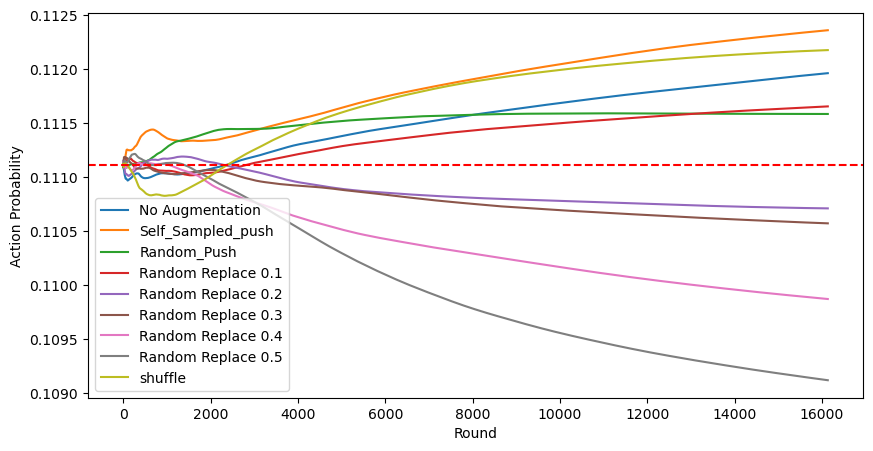

In [59]:
## plot cumulative average of dirichlet priors

plt.figure(figsize=(10, 5))
for i in range(9):
    plt.plot(np.cumsum(dirichlet_priors[:, i])/(np.arange(dirichlet_priors.shape[0])+1), label=aug_names[i])
plt.xlabel("Round")
plt.ylabel("Action Probability")
plt.legend()

## draw 1/9 line
plt.axhline(y=1/9, color='r', linestyle='--')

plt.show()

In [73]:
## now for gaussian process and random search

## collect 2024-09-28 12:59:52,558 (shadow_client_and_server:259) INFO: {Augmentation Control : [0.151048, 0.142294, 0.209212, 0.186631, 0.140913, 8.196218e-09, 0.12033, 0.049571, 8.196218e-09]}
## augmentation control
augmentation_controls = []

def get_weighted_control(line : str) -> List[float]:
    str_control = line.split("{Augmentation Control : ")[1][:-1]
    ##str to list formats are '[a, b, c, ...]'
    control = [float(x) for x in str_control[1:-1].split(", ")]
    return control


    
def print_logs_to_average_control(print_log_path) :
    print_lines = load_log_file(print_log_path).split("\n")
    augmentation_controls = []
    for line in print_lines :
        if "Augmentation Control" in line:
            augmentation_controls.append(get_weighted_control(line))
    augmentation_controls = np.array(augmentation_controls)
    augmentation_controls = augmentation_controls / np.sum(augmentation_controls, axis=1)[:, np.newaxis]
    
    return augmentation_controls







(18501, 9)


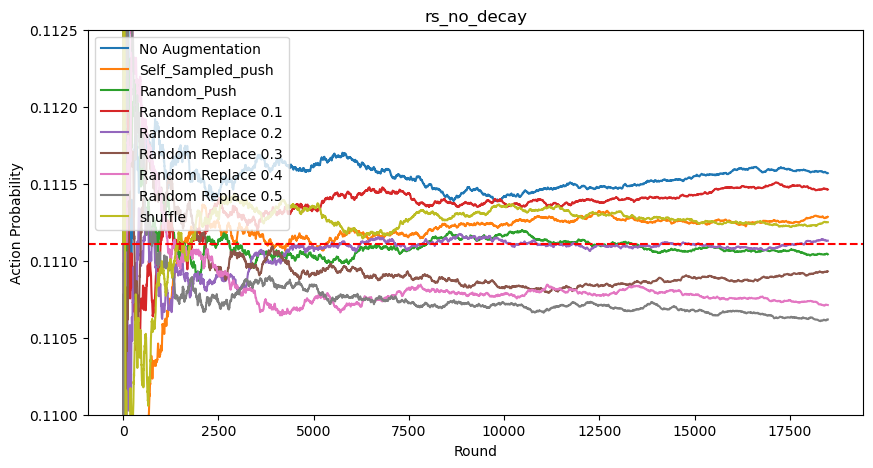

(18471, 9)


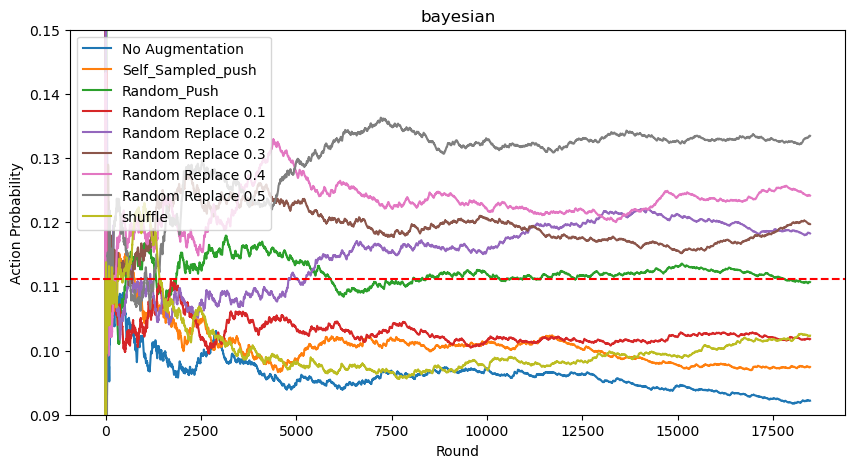

In [77]:
## draw cumulative average of augmentation controls

#print_logs_to_average_control(method_names_and_print_log_path["rs_no_decay"])
#print_logs_to_average_control(method_names_and_print_log_path["bayesian"])

for method_name in ["rs_no_decay", "bayesian"]:
    plt.figure(figsize=(10, 5))
    augmentation_controls = print_logs_to_average_control(method_names_and_print_log_path[method_name])
    print(augmentation_controls.shape)
    for i in range(9):
        plt.plot(np.cumsum(augmentation_controls[:, i])/(np.arange(augmentation_controls.shape[0])+1), label=aug_names[i])
    plt.xlabel("Round")
    plt.ylabel("Action Probability")
    plt.legend()
    
    plt.axhline(y=1/9, color='r', linestyle='--')
    
    if method_name == "bayesian":
        plt.ylim(0.0900,0.1500)
    else :
        plt.ylim(0.1100, 0.1125)
    plt.title(method_name)
    plt.show()

In [78]:
## MAB variants

## collect 2024-09-23 21:50:37,543 (shadow_client_and_server:561) INFO: Augmentation Controll : 3
mab_variant_controls = []

total_mab_variants = 9


def get_mab_variant_control(line : str) -> int:
    control = int(line.split("Augmentation Controll : ")[1])
    return control

def mab_print_logs_to_controls(print_log_path) :
    print_lines = load_log_file(print_log_path).split("\n")
    mab_variant_controls = []
    for line in print_lines :
        if "Augmentation Controll" in line:
            control_int = get_mab_variant_control(line)
            mab_variant_controls.append(control_int)
    mab_variant_controls = [np.eye(total_mab_variants)[control] for control in mab_variant_controls]
    mab_variant_controls = np.array(mab_variant_controls)
    return mab_variant_controls


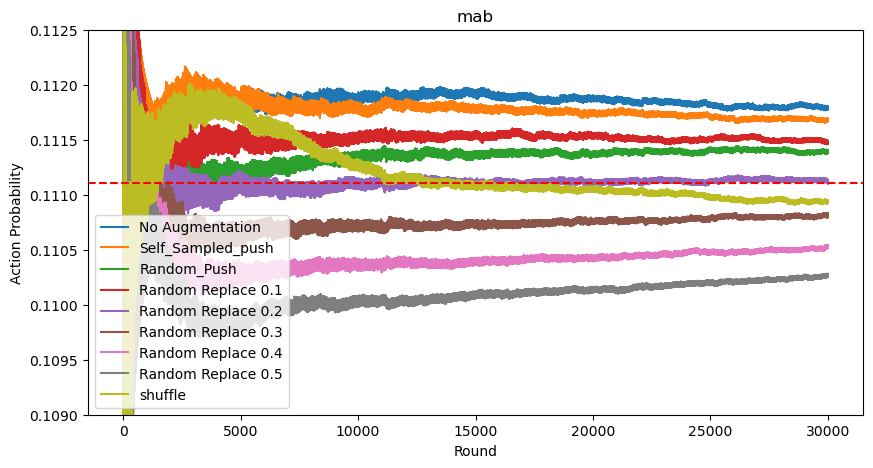

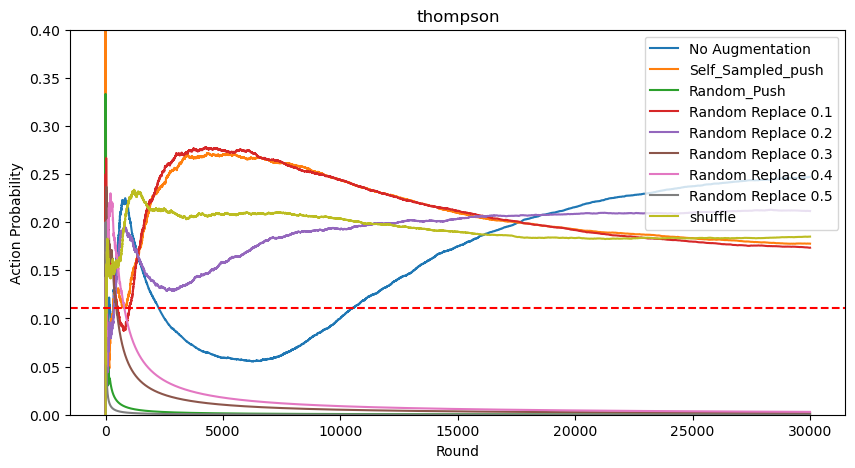

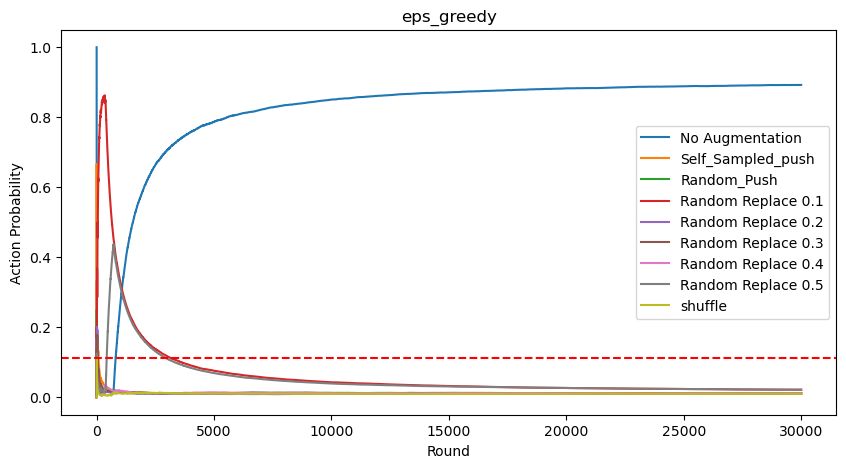

In [85]:
## as round progesses, check the average of the control

for method_name in ["mab", "thompson", "eps_greedy"]:
    controls = mab_print_logs_to_controls(method_names_and_print_log_path[method_name])
    plt.figure(figsize=(10, 5))
    for i in range(9):
        plt.plot(np.cumsum(controls[:, i])/(np.arange(controls.shape[0])+1), label=aug_names[i])
    plt.xlabel("Round")
    plt.ylabel("Action Probability")
    plt.legend()
    plt.axhline(y=1/9, color='r', linestyle='--')
    if method_name == "mab":
        plt.ylim(0.1090,0.1125)
    elif method_name == "thompson":
        plt.ylim(0.0000,0.4000)
    else :
        None
    
    plt.title(method_name)
    plt.show()
    
